In [1]:
import pickle
import numpy as np
word = pickle.load(open("dataset2.pkl", "rb"))

In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X = word["matrix"]
X_std = StandardScaler().fit_transform(X)
target = word["label"]

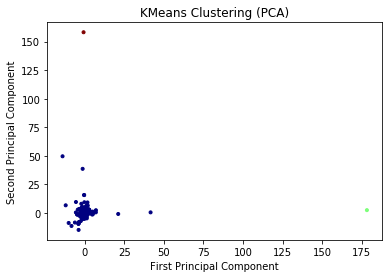

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=n_components).fit(X_std)

X_2d = pca.transform(X_std)

Target = []
for i,t in enumerate(target):
    if t == 'news_edu':
        Target.append('r')
    elif t == 'news_finance':
        Target.append('g')
    else:
        Target.append('b')

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
X_clustered = kmeans.fit_predict(X_2d)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('KMeans Clustering (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
ax1.scatter(X_2d[:,0],X_2d[:,1],c=X_clustered,cmap ='jet',marker='.')
plt.show()
